# Sieci neuronowe i Deep Learning
# Temat 6: PyTorch dla bardziej zaawansowanych

## Zadanie 6.1

Na przykładzie problemu XOR porównać działanie sieci MLP o różnych architekturach (o różnej głębokości i szerokości).

- Przeanalizować, co się dzieje, gdy dokładamy kolejne warstwy ukryte (jedną, dwie, trzy i cztery) o tej samej wielkości, na przykład z 4, 10 neuronami.

- Przeanalizować, co się dzieje, gdy zwiększamy szerokość ukrytych warstw (dla jednej ukrytej warstwy i dla dwóch ukrytych warstw).

- Przy której ze strategii będziemy w stanie osiągać dobre wyniki predykcyjne dla możliwie małej (o małej liczbie parametrów) sieci neuronowej?

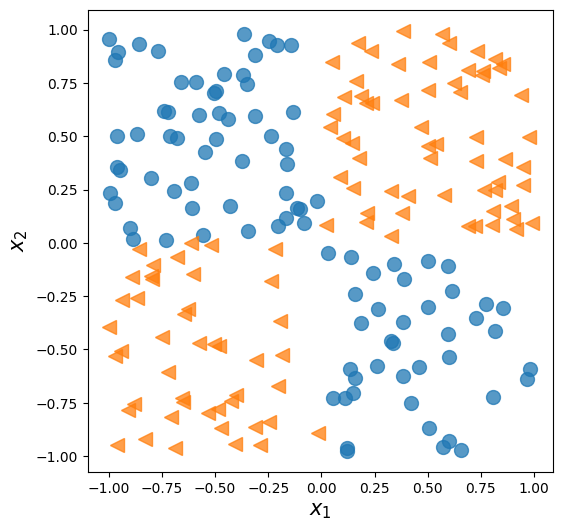

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
torch.manual_seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)

plt.show()

In [2]:
# Przygotowanie danych pod budowę sieci neuronwych:
from torch.utils.data import DataLoader, TensorDataset

train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

## Przeanalizować, co się dzieje, gdy dokładamy kolejne warstwy ukryte (jedną, dwie, trzy i cztery) o tej samej wielkości, na przykład z 4, 10 neuronami.


## Model - 1 warstwa (0 ukrytych)

In [3]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [4]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [5]:
### Proces uczenia się

torch.manual_seed(1)

num_epochs = 200

def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

Text(0.5, 0, 'Epochs')

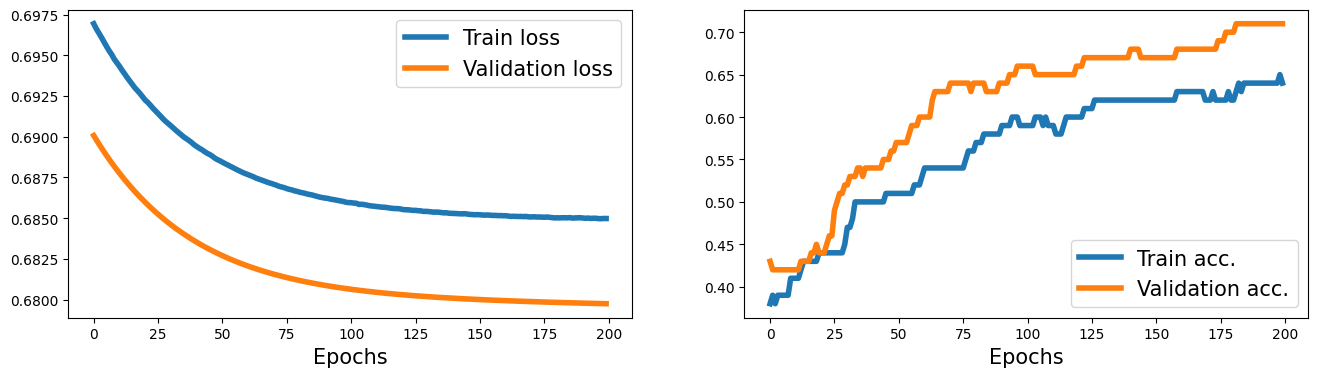

In [6]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

## Model - 2 warstwy (1 ukryta)

In [7]:
model_2 = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.015)


Text(0.5, 0, 'Epochs')

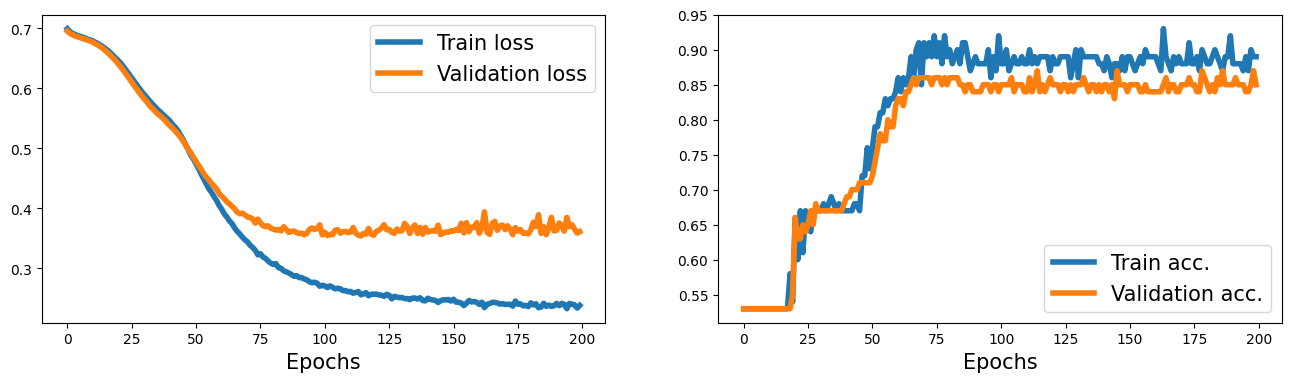

In [8]:
history_2 = train(model_2, num_epochs, train_dl, x_valid, y_valid)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_2[0], lw=4)
plt.plot(history_2[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history_2[2], lw=4)
plt.plot(history_2[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

## Model - 3 warstwy

In [9]:
model_3 = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.015)


Text(0.5, 0, 'Epochs')

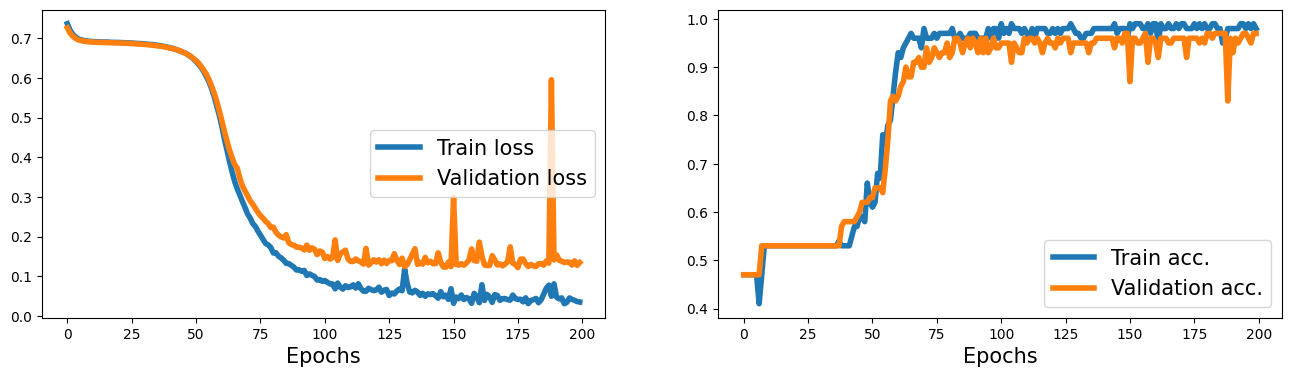

In [10]:
history_3 = train(model_3, num_epochs, train_dl, x_valid, y_valid)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_3[0], lw=4)
plt.plot(history_3[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history_3[2], lw=4)
plt.plot(history_3[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

## Model - 4 warstwy

In [11]:
model_4 = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.015)


Text(0.5, 0, 'Epochs')

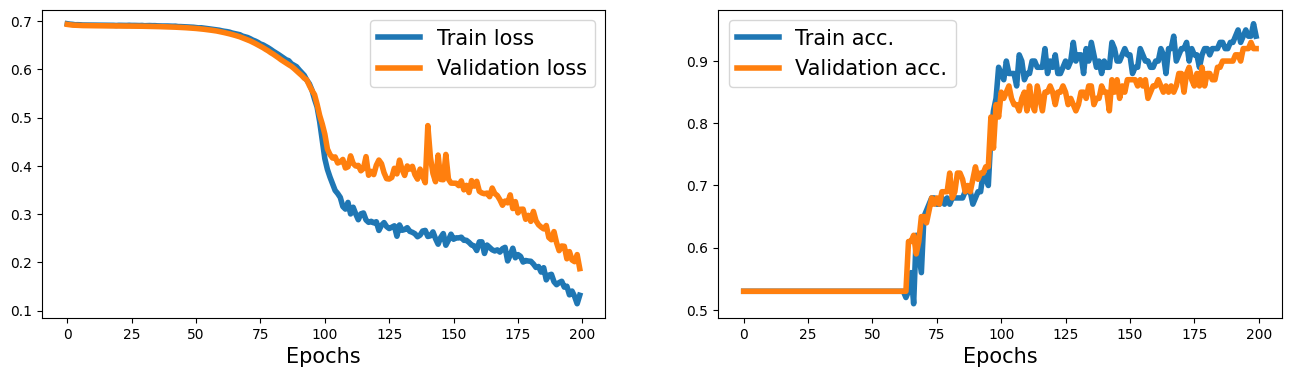

In [12]:
history_4 = train(model_4, num_epochs, train_dl, x_valid, y_valid)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_4[0], lw=4)
plt.plot(history_4[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history_4[2], lw=4)
plt.plot(history_4[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

## Model - 5 warstwy

In [13]:
model_5 = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
optimizer = torch.optim.SGD(model_5.parameters(), lr=0.015)


Text(0.5, 0, 'Epochs')

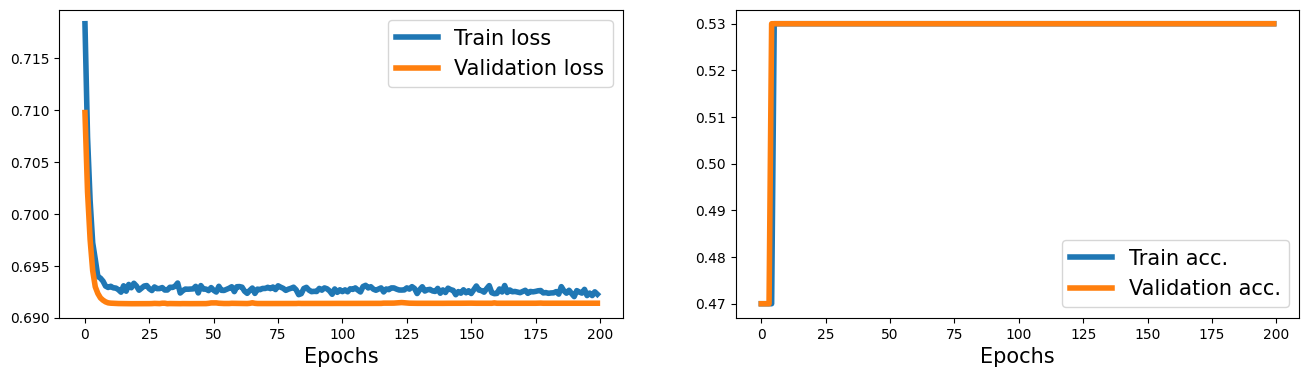

In [14]:
history_5 = train(model_5, num_epochs, train_dl, x_valid, y_valid)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_5[0], lw=4)
plt.plot(history_5[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history_5[2], lw=4)
plt.plot(history_5[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

Text(0.5, 1.0, 'Train Loss')

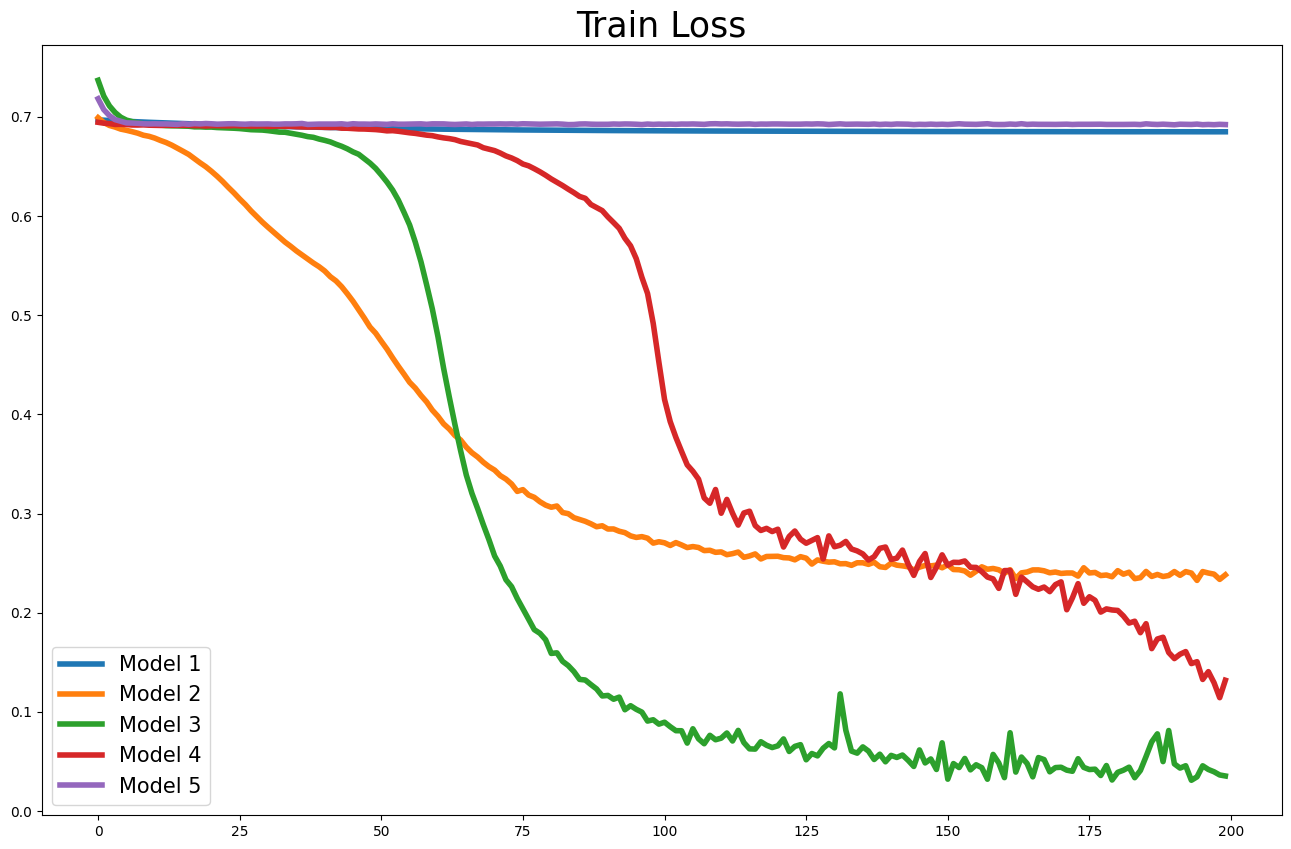

In [15]:
fig = plt.figure(figsize=(16, 10))
plt.plot(history[0], lw=4)
plt.plot(history_2[0], lw=4)
plt.plot(history_3[0], lw=4)
plt.plot(history_4[0], lw=4)
plt.plot(history_5[0], lw=4)

plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.title('Train Loss', size=25)

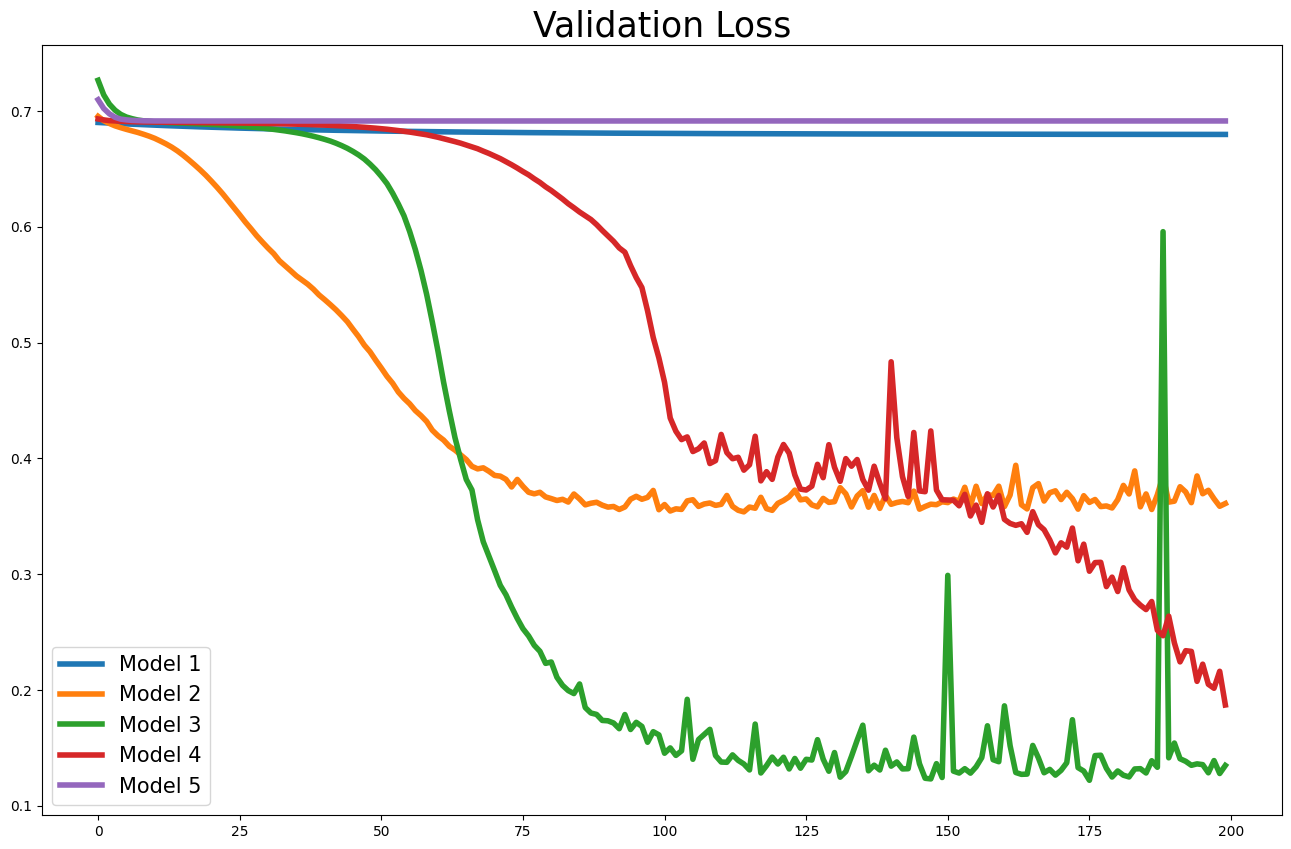

In [16]:
fig = plt.figure(figsize=(16, 10))
plt.plot(history[1], lw=4)
plt.plot(history_2[1], lw=4)
plt.plot(history_3[1], lw=4)
plt.plot(history_4[1], lw=4)
plt.plot(history_5[1], lw=4)

plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.title('Validation Loss', size=25)
plt.show()

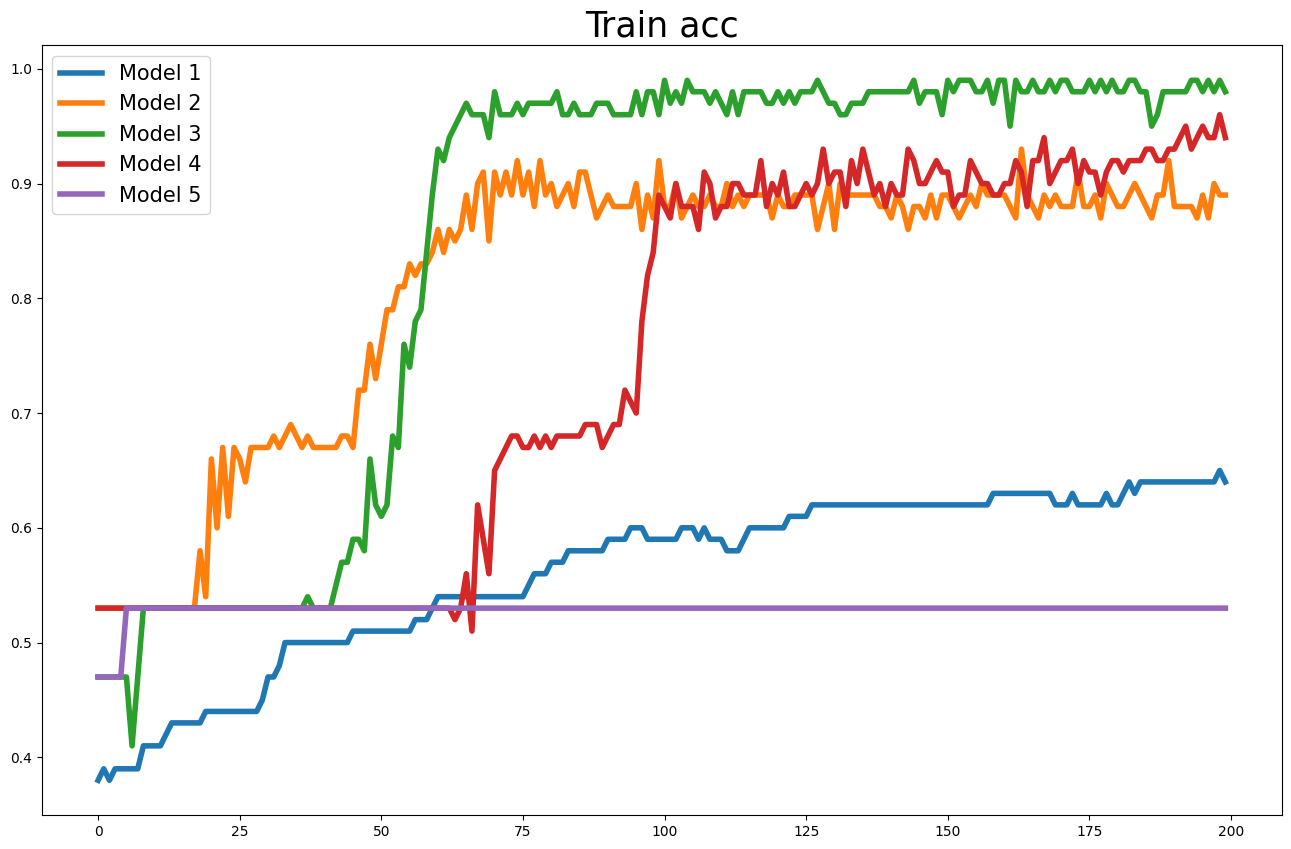

In [17]:
fig = plt.figure(figsize=(16, 10))
plt.plot(history[2], lw=4)
plt.plot(history_2[2], lw=4)
plt.plot(history_3[2], lw=4)
plt.plot(history_4[2], lw=4)
plt.plot(history_5[2], lw=4)

plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.title('Train acc', size=25)
plt.show()

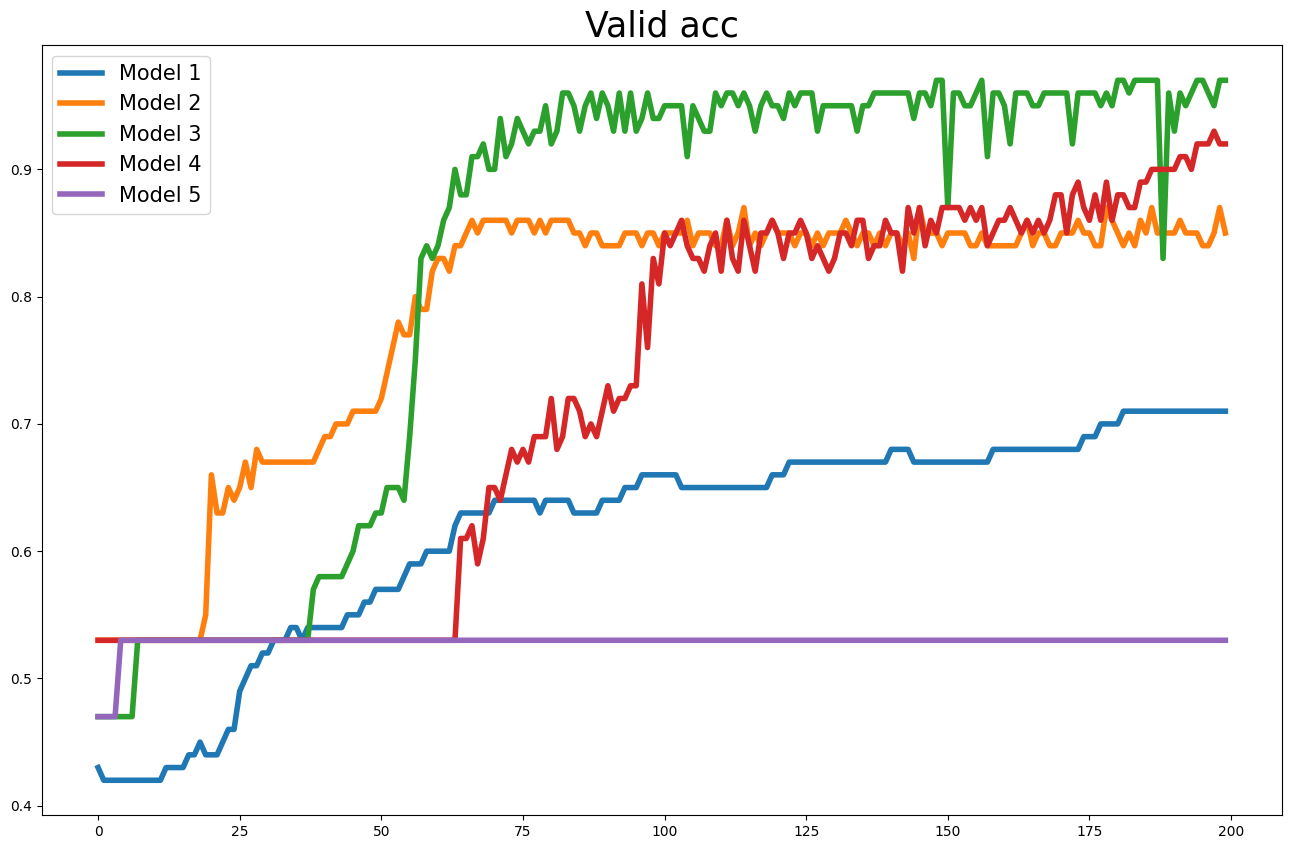

In [18]:
fig = plt.figure(figsize=(16, 10))
plt.plot(history[3], lw=4)
plt.plot(history_2[3], lw=4)
plt.plot(history_3[3], lw=4)
plt.plot(history_4[3], lw=4)
plt.plot(history_5[3], lw=4)

plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.title('Valid acc', size=25)
plt.show()

Na validzie w modelu 3-warstwowym duze wahania (pewnie mozna dopasowac przez learning rate? nie skupialem sie tutaj na tym, wszedzie ustalalem ten sam) w dokładności modelu oraz wartości funkcji straty. Wraz ze wzrostem liczby warstw model się wolniej uczy, potrzebuje więcej epok do osiągnięcia pozytywnych wyników, co chyba logiczne.

## Rózne szerokości warstw

## Przeanalizować, co się dzieje, gdy zwiększamy szerokość ukrytych warstw (dla jednej ukrytej warstwy i dla dwóch ukrytych warstw).


# Dla jednej ukrytej warstwy

In [19]:
model_2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [20]:
model_2_2 = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)
optimizer = torch.optim.SGD(model_2_2.parameters(), lr=0.015)

history_2_2 = train(model_2_2, num_epochs, train_dl, x_valid, y_valid)


Text(0.5, 0, 'Epochs')

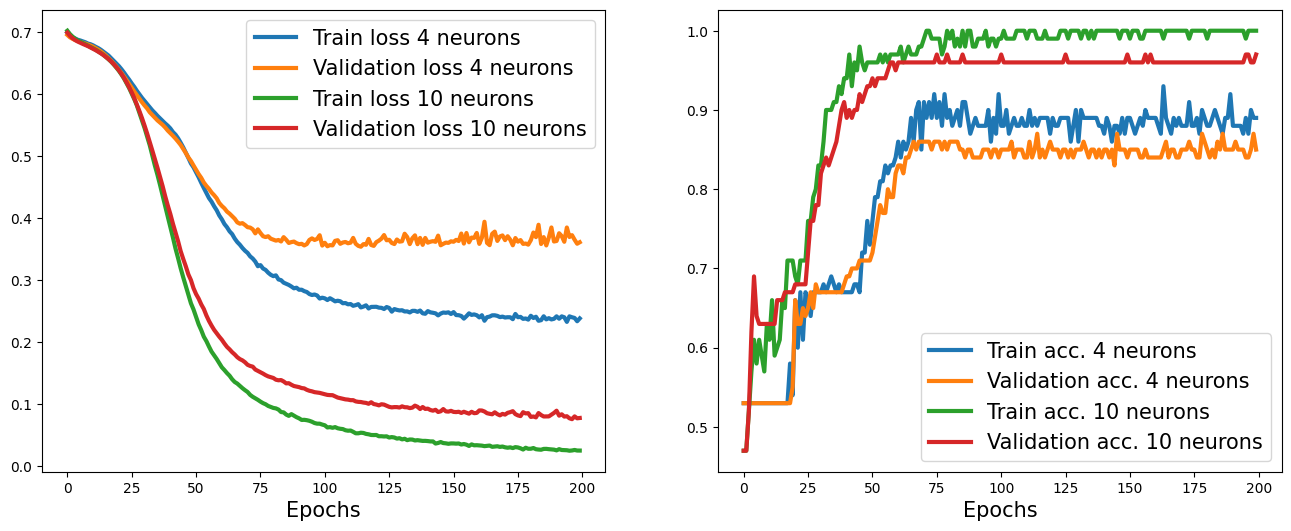

In [21]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_2[0], lw=3)
plt.plot(history_2[1], lw=3)
plt.plot(history_2_2[0], lw=3)
plt.plot(history_2_2[1], lw=3)
plt.legend(['Train loss 4 neurons', 'Validation loss 4 neurons', 'Train loss 10 neurons', 'Validation loss 10 neurons'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history_2[2], lw=3)
plt.plot(history_2[3], lw=3)
plt.plot(history_2_2[2], lw=3)
plt.plot(history_2_2[3], lw=3)
plt.legend(['Train acc. 4 neurons', 'Validation acc. 4 neurons', 'Train acc. 10 neurons', 'Validation acc. 10 neurons'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

Model z 10 neuronami szybciej sie uczy oraz ogolnie osiaga lepsze wyniki.

# Dla 2 ukrytych warstw

In [22]:
model_3

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=4, bias=True)
  (5): ReLU()
  (6): Linear(in_features=4, out_features=1, bias=True)
  (7): Sigmoid()
)

In [23]:
model_3_2 = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)
optimizer = torch.optim.SGD(model_3_2.parameters(), lr=0.015)

history_3_2 = train(model_3_2, num_epochs, train_dl, x_valid, y_valid)


In [24]:
model_3_2.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=1, bias=True)
  (7): Sigmoid()
)>

Text(0.5, 0, 'Epochs')

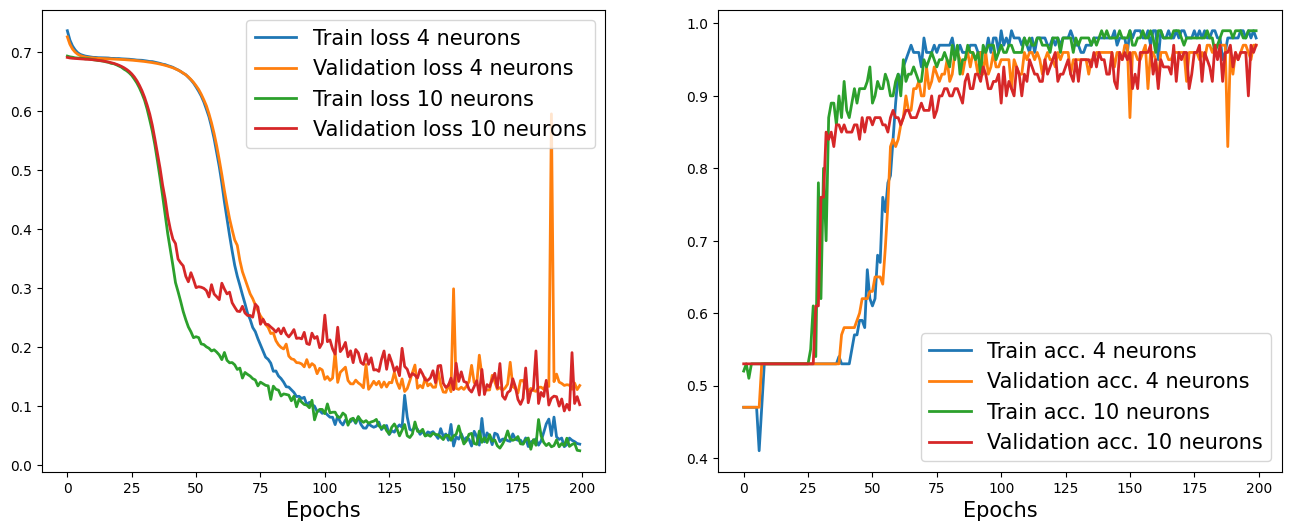

In [25]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_3[0], lw=2)
plt.plot(history_3[1], lw=2)
plt.plot(history_3_2[0], lw=2)
plt.plot(history_3_2[1], lw=2)
plt.legend(['Train loss 4 neurons', 'Validation loss 4 neurons', 'Train loss 10 neurons', 'Validation loss 10 neurons'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history_3[2], lw=2)
plt.plot(history_3[3], lw=2)
plt.plot(history_3_2[2], lw=2)
plt.plot(history_3_2[3], lw=2)
plt.legend(['Train acc. 4 neurons', 'Validation acc. 4 neurons', 'Train acc. 10 neurons', 'Validation acc. 10 neurons'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

Tutaj juz wyniki przy duzej liczbie epok sa zblizone, ale wciaz model z 10 neuronami szybciej sie uczy.

In [26]:
model_2_3 = nn.Sequential(
    nn.Linear(2, 30),
    nn.ReLU(),
    nn.Linear(30, 30),
    nn.ReLU(),
    nn.Linear(30, 1),
    nn.Sigmoid()
)
optimizer = torch.optim.SGD(model_2_3.parameters(), lr=0.015)

history_2_3 = train(model_2_3, num_epochs, train_dl, x_valid, y_valid)


Text(0.5, 0, 'Epochs')

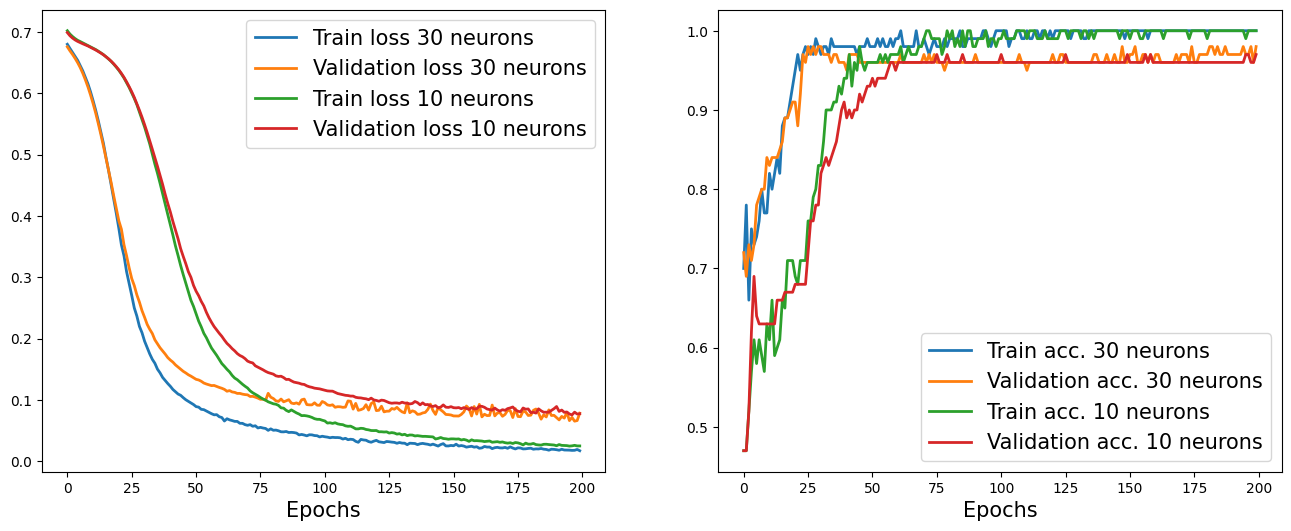

In [27]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_2_3[0], lw=2)
plt.plot(history_2_3[1], lw=2)
plt.plot(history_2_2[0], lw=2)
plt.plot(history_2_2[1], lw=2)
plt.legend(['Train loss 30 neurons', 'Validation loss 30 neurons', 'Train loss 10 neurons', 'Validation loss 10 neurons'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history_2_3[2], lw=2)
plt.plot(history_2_3[3], lw=2)
plt.plot(history_2_2[2], lw=2)
plt.plot(history_2_2[3], lw=2)
plt.legend(['Train acc. 30 neurons', 'Validation acc. 30 neurons', 'Train acc. 10 neurons', 'Validation acc. 10 neurons'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

Przy 30 neuronach nie ma tez duzej roznicy w jakosci modelu (przy duzej ilosci epok). Ogolnie zwiekszajac liczbe neurownow w warstwie na pewno model sie na poczatku szybciej uczy (zdecydowanie szybciej spada wartosc funkci straty oraz jednoczesnie wzrasta dokladnosc).

## Porównanie głębokość vs szerokość

## - Przy której ze strategii będziemy w stanie osiągać dobre wyniki predykcyjne dla możliwie małej (o małej liczbie parametrów) sieci neuronowej?

Dobrze wypadl model z 1 warstwa ukryta z 4 neuronami, szczegolnie biorac pod uwage, ze ma mala liczbe parametrow.

In [28]:
model_2_parameters = sum(p.numel() for p in model_2.parameters())
model_2_parameters

37

Text(0.5, 0, 'Epochs')

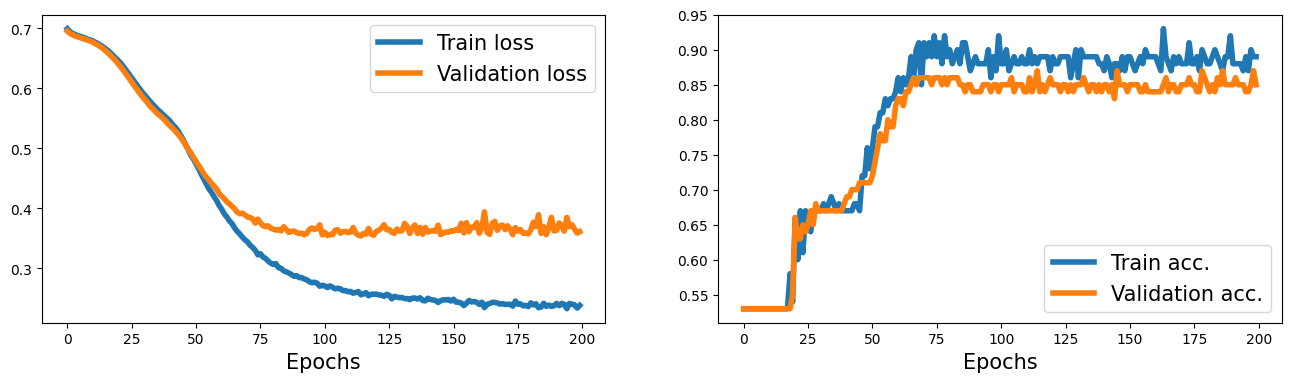

In [29]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_2[0], lw=4)
plt.plot(history_2[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history_2[2], lw=4)
plt.plot(history_2[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# Ustalić liczbę parametrów i zobaczyc czy lepiej isc w glebokosc czy w szerokosc

Dla 1-warstwowego wychodzilo slabo, skupmy sie na dwuwarstwowym ale zmniejszmy liczme neuronow w warstwie.

In [30]:
model_2_smaller = nn.Sequential(
    nn.Linear(2, 3),
    nn.ReLU(),
    nn.Linear(3, 3),
    nn.ReLU(),
    nn.Linear(3, 1),
    nn.Sigmoid()
)

In [31]:
model_2_smaller_parameters = sum(p.numel() for p in model_2_smaller.parameters())
model_2_smaller_parameters

25

Text(0.5, 0, 'Epochs')

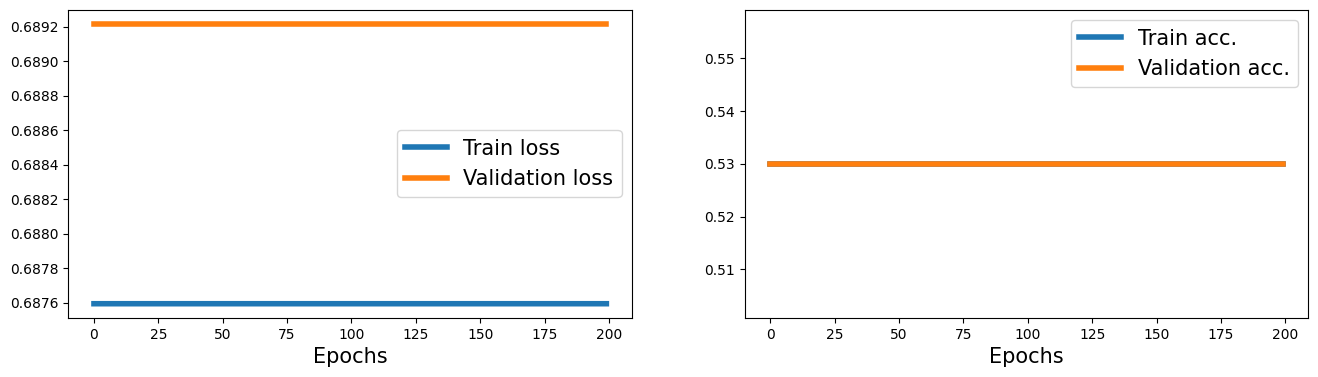

In [32]:
history_candidate_2 = train(model_2_smaller, num_epochs, train_dl, x_valid, y_valid)


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_candidate_2[0], lw=4)
plt.plot(history_candidate_2[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history_candidate_2[2], lw=4)
plt.plot(history_candidate_2[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

wychodzi slabo, zostajemy przy poprzednim. Idzmy w glebokosc, dodajmy warstwy o malej liczbie neuronow.

In [33]:
model_candidate = nn.Sequential(
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 1),
    nn.Sigmoid()
)
optimizer = torch.optim.SGD(model_candidate.parameters(), lr=0.015)

In [34]:
param_num_deep_narrow = sum(p.numel() for p in model_candidate.parameters())
param_num_deep_narrow

27

Text(0.5, 0, 'Epochs')

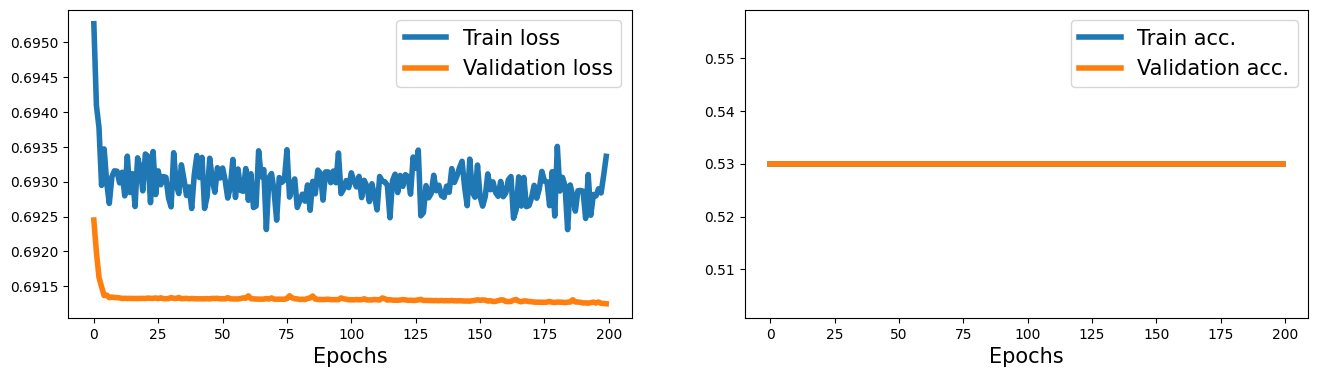

In [35]:
history_candidate = train(model_candidate, num_epochs, train_dl, x_valid, y_valid)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_candidate[0], lw=4)
plt.plot(history_candidate[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history_candidate[2], lw=4)
plt.plot(history_candidate[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

In [36]:
model_candidate2 = nn.Sequential(
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 1),
    nn.Sigmoid()
)
optimizer = torch.optim.SGD(model_candidate2.parameters(), lr=0.015)

Text(0.5, 0, 'Epochs')

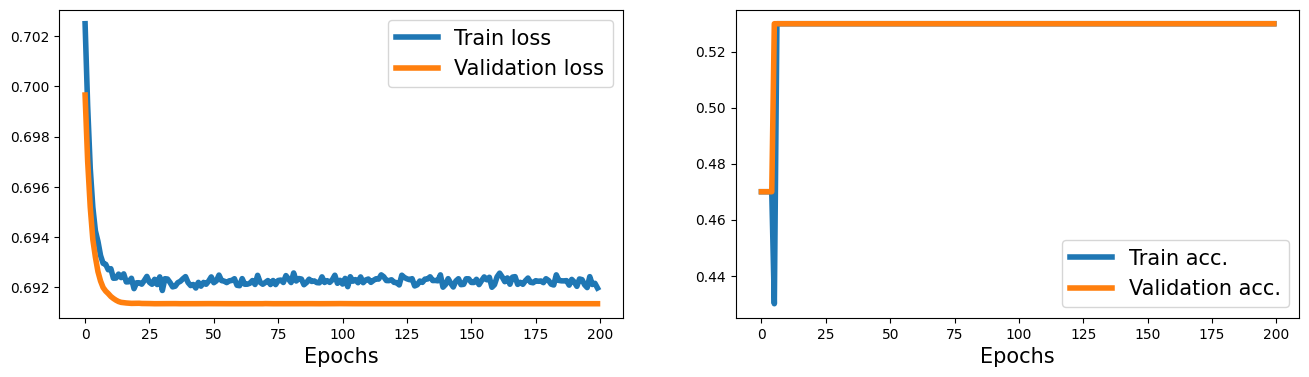

In [37]:
history_candidate2 = train(model_candidate2, num_epochs, train_dl, x_valid, y_valid)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_candidate2[0], lw=4)
plt.plot(history_candidate2[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history_candidate2[2], lw=4)
plt.plot(history_candidate2[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

In [38]:
param_num_deep_narrow2 = sum(p.numel() for p in model_candidate2.parameters())
param_num_deep_narrow2

21

In [39]:
model_candidate3 = nn.Sequential(
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 1),
    nn.Sigmoid()
)
optimizer = torch.optim.SGD(model_candidate3.parameters(), lr=0.015)

Text(0.5, 0, 'Epochs')

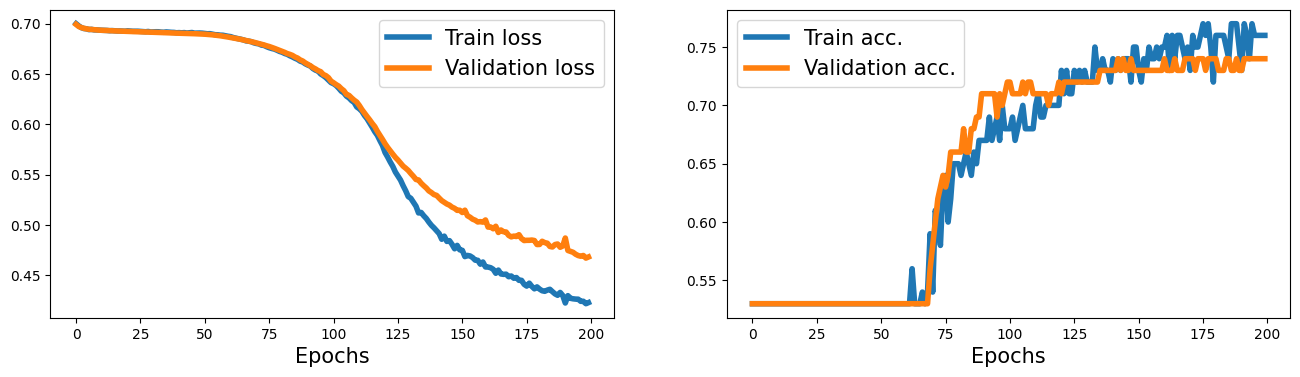

In [40]:
history_candidate3 = train(model_candidate3, num_epochs, train_dl, x_valid, y_valid)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history_candidate3[0], lw=4)
plt.plot(history_candidate3[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history_candidate3[2], lw=4)
plt.plot(history_candidate3[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

Chyba prz tych danych lepiej isc w szerokosc niz glebokosc, Majac jedna warstwe ukryta z 4 neuronami, zatem 37 parametrow, mamy juz dosyc dobra siec.

## Zadanie 6.2*

Wykorzystując klasę `nn.Module`,
zdefiniować niestandardową warstwę, która mnoży dane wejściowe przez stałą wartość (skalowanie), która jest (uczonym) parametrem modelu.

Zmodyfikować wybraną sieć (z tych zbudowanych podczas jednych z poprzednich zajęć), uwzględniając w niej zdefiniowaną warstwę.